# Regional Livestock Production Analysis in Africa: An Analysis of Key Products and Regional Contributions

- [1 - Introduction](#1)
   - [1.1 - Project Scope](#1-1)
- [2 - Import Dependence](#2)
- [3 - Gather Data](#3)
- [4 - Data Cleaning](#4)
- [5 - Exploratory Data Analysis and Visualization](#5)
   - [5.1 - Regional Distribution of Livestock Products](#5-1)
   - [5.2 - Egg Productions](#5-2)
   - [5.3 - Meat Production](#5-3)
   - [5.4 - Hides Production](#5-4)
   - [5.5 - Milk Productions](#5-5)
   - [5.6 - Fat Productions](#5-6)
- [6 - Statistical Analysis](#6)
- [7 - Findings](#7)
- [8 - Conclusions](#8)
conclusions)
ons)


<a name="1"></a>
## 1 - Introduction

<a name="1-1"></a>
### 1.1 - Project Scope

The goal of this analysis was to explore and understand livestock production trends in Africa, focusing on key livestock products such as eggs, meat, hides, milk, and fat. By breaking down the data into regions and product categories, the analysis aimed to provide insights into:

- The distribution of livestock production across various regions in Africa.
- The major contributors to specific livestock products.
- The trends over time for selected livestock products.
- Regional variations in production of key livestock products, including eggs, meat, and hides.



<a name="1-2"></a>
### 1.2 - Data Overview

The dataset used in this analysis was sourced from the **FAO (Food and Agriculture Organization)**, focusing on **livestock production in Africa**. The analysis was limited to key livestock products like **meat, milk, eggs, hides,** and **fat**, filtered by region and year to explore production trends and regional contributions.

| Column   | Description                                                                 |
|----------|-----------------------------------------------------------------------------|
| Ara   | The geographical region within Africa (e.g., South Africa,Ghana, Sudan).     |
| Item     | The specific livestock product (e.g., cattle meat, hen eggs, goat milk).     |
| Year     | The year of production for the livestock products.  (1961 - 2022)                        |
| Value    | The production value (in metric tons) for each product.                     |


<a name="1-3"></a>
### 1.3 - Key Objectives



1. **Production Trends**: To analyze how different regions in Africa contribute to the production of key livestock products.
2. **Regional Comparisons**: To identify which regions produce the highest amounts of livestock products, and compare production levels across regions.
3. **Product Category Analysis**: To analyze the relative proportions of different livestock products like meat, milk, eggs, hides, and fat in the overall production.
4. **Growth Over Time**: To assess the year-on-year change in production and identify whether there has been an increase or decrease over time.
5. **Significant Differences in Regional Production**: To determine whether there is a statistically significant difference in livestock production between regions (using hypothesis testing).


<a name="2"></a>
## 2 - Import Dependence

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")


<a name="3"></a>
## 3 - Gather Data

In [5]:
df = pd.read_csv("./FAOSTAT_data_en_9-22-2024.csv")

In [6]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,12,Algeria,5314,Prod Popultn,2960.01,Beeswax,1961,1961,No,100000.0,X,Figure from international organizations,Unofficial figure
1,QCL,Crops and livestock products,12,Algeria,5314,Prod Popultn,2960.01,Beeswax,1962,1962,No,105000.0,X,Figure from international organizations,Unofficial figure
2,QCL,Crops and livestock products,12,Algeria,5314,Prod Popultn,2960.01,Beeswax,1963,1963,No,110000.0,X,Figure from international organizations,Unofficial figure
3,QCL,Crops and livestock products,12,Algeria,5314,Prod Popultn,2960.01,Beeswax,1964,1964,No,115000.0,X,Figure from international organizations,Unofficial figure
4,QCL,Crops and livestock products,12,Algeria,5314,Prod Popultn,2960.01,Beeswax,1965,1965,No,120000.0,X,Figure from international organizations,Unofficial figure


<a name="4"></a>
## 4 - Data Cleaning

### a. Convert Data Types

In [7]:
df.dtypes

Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)     float64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
Note                 object
dtype: object

### b. Resolve Data Issues

#### i. Missing Data

In [8]:
df.isna().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                70503
dtype: int64

The dataset contain no missing value

#### ii. Duplicate Rows

In [9]:
df[df.duplicated()]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note


#### iii. Inconsistent Text & Typos

In [10]:
df['Area'] = np.where(df['Area']=='Democratic Republic of the Congo','Congo',df['Area'])
df['Area'] = np.where(df['Area']=='Ethiopia PDR','Ethiopia',df['Area'])

In [11]:
display(df[df['Area']=='Democratic Republic of the Congo'] )
display(df[df['Area']=='Ethiopia PDR'] )

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note


### c. Create New Columns

* Region: Get the region of each country
* Category: Categories the livestock product e.g Meat Products,Dairy Products, Fat Product,Hides product

In [12]:
def Categories(X):
    if bool(re.search(r'[Mm]eat|Edible|Snails', X)):
        return 'Meat'
    if bool(re.search(r'[Ee]ggs', X)):
        return 'Egg'
    if bool(re.search(r'[Hh]ides', X)):
        return 'Hides'
    if bool(re.search(r'[Mm]ilk', X)):
        return 'Milk'
    if bool(re.search(r'[Ff]at', X)):
        return 'Fat'
    if bool(re.search(r'Beeswax', X)):
        return 'Beeswax'


In [13]:
df["Category"]=df['Item'].apply(lambda X: Categories(X))

In [14]:
df["Category"].value_counts()

Category
Meat       35995
Fat        13989
Hides       9933
Milk        7284
Egg         3586
Beeswax      708
Name: count, dtype: int64

In [15]:
df["Category"].isna().sum()

0

In [16]:
north_africa = [
    'Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan (former)', 'Tunisia','Sudan'
]

west_africa = [
    'Benin', 'Burkina Faso', 'Cabo Verde', 'Côte d\'Ivoire', 'Gambia', 
    'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 
    'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'
]

central_africa = [
    'Angola', 'Cameroon', 'Central African Republic', 'Chad', 
    'Congo', 'Equatorial Guinea', 'Gabon', 
     'Sao Tome and Principe'
]

east_africa = [
    'Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 
    'Madagascar', 'Malawi', 'Rwanda', 'Somalia', 'South Sudan', 
    'United Republic of Tanzania', 'Uganda', 'Zambia', 'Zimbabwe','Comoros', 'Mauritius', 'Seychelles', 'Réunion','Mozambique'
]

southern_africa = [
    'Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa' 
]


In [17]:
def region(x):
    if x in north_africa:
        return "North Africa"
    if x in west_africa:
        return "West Africa"
    if x in east_africa:
        return "East Africa"
    if x in  southern_africa:
        return "Southern Africa"
    if x in central_africa:
        return "Central Africa"
    

In [18]:
df["region"] = df["Area"].apply(lambda x:region(x))

In [19]:
df["region"].value_counts()

region
East Africa        22616
West Africa        21474
Central Africa     11156
North Africa       10035
Southern Africa     6214
Name: count, dtype: int64

In [20]:
df[df["region"].isna()]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Category,region


In [21]:
ps34:17

<a name="5"></a>
## 5 - Exploratory Data Analysis and Visualization

<a name="5-1"></a>
### 5.1 - Regional Distribution of Livestock Products

In [22]:
df_2022 =df[df['Year']==2022][['Area','Year','Element','Item','Value','Category','region']]
df_2022.head()

,Area,Year,Element,Item,Value,Category,region
91,Algeria,2022,Producing Animals/Slaughtered,"Cattle fat, unrendered",635036.13,Fat,North Africa
153,Algeria,2022,Producing Animals/Slaughtered,"Edible offal of cattle, fresh, chilled or frozen",635036.13,Meat,North Africa
215,Algeria,2022,Producing Animals/Slaughtered,"Edible offal of goat, fresh, chilled or frozen",1923868.93,Meat,North Africa
277,Algeria,2022,Producing Animals/Slaughtered,"Edible offal of pigs, fresh, chilled or frozen",2782.43,Meat,North Africa
339,Algeria,2022,Producing Animals/Slaughtered,"Edible offal of sheep, fresh, chilled or frozen",18032081.47,Meat,North Africa


In [23]:
categories_2022 =df_2022.pivot_table(index='region',columns='Category',values="Value",aggfunc="sum")
categories_2022

Category,Egg,Fat,Hides,Meat,Milk
region,,,,,
Central Africa,58266.0,4.526000e+07,40331478.0,9.075194e+07,7937586.0
East Africa,100425.0,1.091748e+08,90102942.0,2.190688e+08,89074223.0
North Africa,117382.0,8.112916e+07,80345310.0,1.654464e+08,87940643.0
Southern Africa,66294.0,1.442330e+07,10570145.0,2.988428e+07,1763260.0
West Africa,227530.0,9.882740e+07,84208527.0,1.991041e+08,68635034.0


In [24]:
categories_2022_percentage = categories_2022.div(categories_2022.sum(axis=0), axis=1) * 100

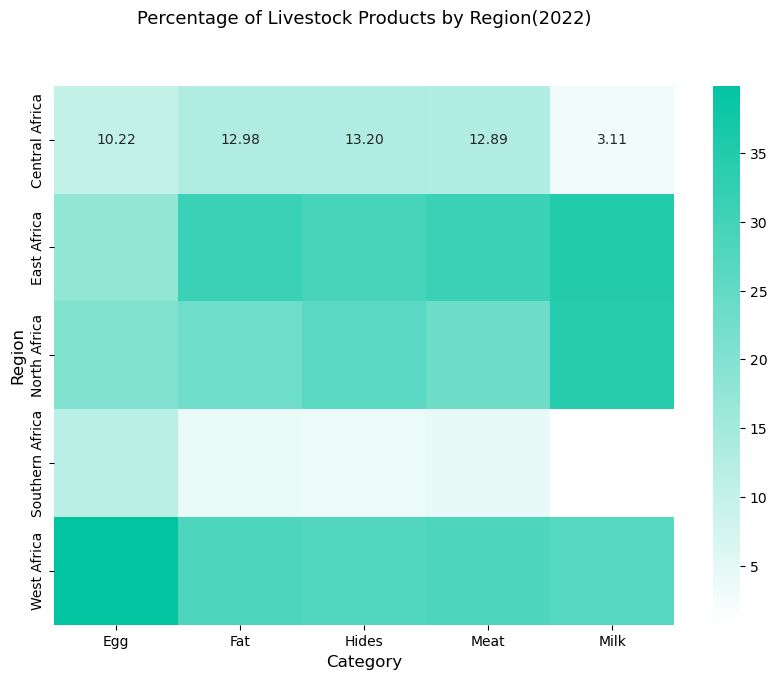

In [25]:
from matplotlib.colors import LinearSegmentedColormap 
plt.figure(figsize=(10, 7))

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['white', '#03c4a1'])
sns.heatmap(categories_2022_percentage, annot=True, cmap=custom_cmap, fmt='.2f')
plt.title('Percentage of Livestock Products by Region(2022)', fontsize=13,y=1.1)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

In 2022, there was a minor decrease in egg production compared to the previous year, with a drop of 2.86%. West Africa emerged as the major producer, contributing 39.9% of Africa's total egg production, followed by North Africa (38.22%). Central Africa and Southern Africa were the least contributors, accounting for 21.85% combined.

East Africa also demonstrated strong production in cattle-related products such as meat, hides, and milk. Meat production, a key livestock product in Africa, reached 704M tons (43.62%) in 2022. East Africa led with 31.1% of total meat production, followed by North Africa and West Africa, which together made up 51.76%. Southern Africa and Central Africa had lower outputs, contributing 4.24%.

Hides, another significant livestock product, saw a 1.57% increase in production compared to the previous year. Eastern, West, and North Africa were the top producers, accounting for 83.34% of total hide production, while Central Africa and Southern Africa produced 13.20% and 3.34%, respectively.

In terms of fat production, 346M tons were produced in 2022, with Eastern Africa leading the way at 31.3%, followed by West Africa and North Africa, contributing a combined 51.59%. Southern Africa had the lowest production at 4.13%.

Milk production represented 15.82% of Africa’s total livestock output in 2022. East Africa and North Africa were the major contributors, producing 69.32% combined, followed by West Africa (26.9%) and Central Africa (3.11%).

<a name="5-2"></a>
### 5.2 - Egg Production

In 2022, Africa's egg production amounted to approximately 569 million tons, representing 15.82% of the continent's total livestock production. This analysis explores the key egg-producing regions and the significant impact of various egg products on overall production during the year.

#### a. Types of Egg Products

In [26]:
df_2022_egg = df_2022[df_2022['Category'] =='Egg'][['Item','Value','Area']]
group_egg =df_2022_egg.groupby('Item').sum(['Value']).sort_values(by="Value",ascending=False)
group_egg 

,Value
Item,
"Hen eggs in shell, fresh",539679.0
"Eggs from other birds in shell, fresh, n.e.c.",30218.0


Only two kinds of egg were in production in Africa in 2022, Hen and Bird Egg

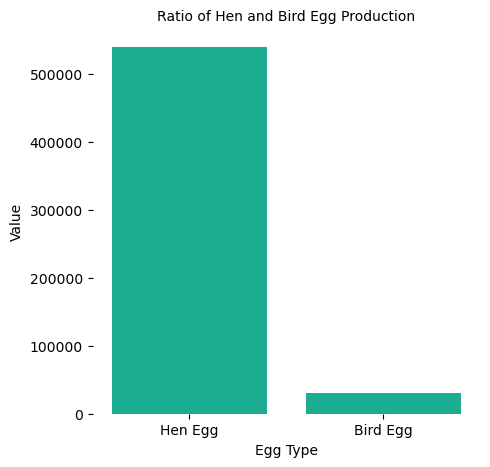

In [27]:
plt.figure(figsize=(5,5))

egg_type =['Hen Egg','Bird Egg']
pos = np.arange(len(egg_type))
sns.barplot(group_egg ,x=group_egg.index,y=group_egg.Value, color='#03c4a1')
plt.xticks(pos, egg_type);
plt.xlabel("Egg Type")
plt.title("Ratio of Hen and Bird Egg Production", fontsize=10,loc='center')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [28]:
group_egg['Percent']= group_egg['Value']/sum(group_egg['Value']) *100
group_egg['Percent']

Item
Hen eggs in shell, fresh                         94.697638
Eggs from other birds in shell, fresh, n.e.c.     5.302362
Name: Percent, dtype: float64

The data shows that hen eggs accounted for the majority of egg production, with a high production rate of 94.7%, while bird eggs contributed 5.3% to the total.

In [29]:
egg_over_years =df[df["Category"]=="Egg"][['Year','Value','Item']]
egg_over_years.head()

,Year,Value,Item
650,1961,3010.0,"Hen eggs in shell, fresh"
651,1962,3215.0,"Hen eggs in shell, fresh"
652,1963,3415.0,"Hen eggs in shell, fresh"
653,1964,3520.0,"Hen eggs in shell, fresh"
654,1965,3730.0,"Hen eggs in shell, fresh"


#### b. Yearly trends of egg production

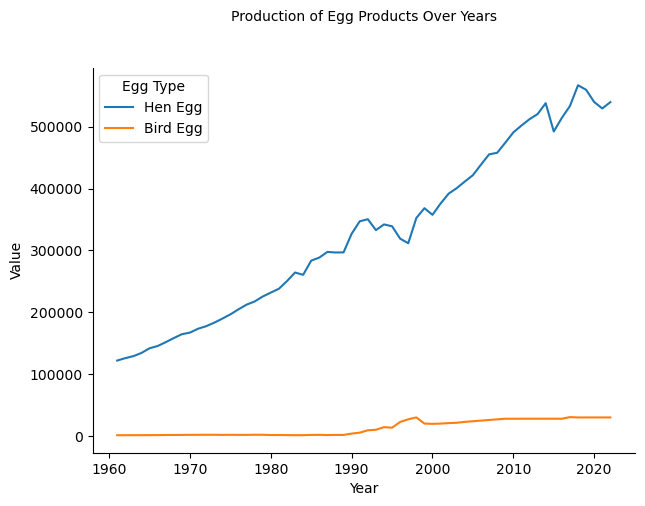

In [30]:
import seaborn as sns

plt.figure(figsize=(7,5))

# Plot the lineplot without fill
sns.lineplot(data=egg_over_years, x="Year", y="Value", hue="Item",estimator=sum,ci=None)

plt.title('Production of Egg Products Over Years', fontsize=10, y=1.1)

custom_labels = ['Hen Egg', 'Bird Egg']  
plt.legend(title='Egg Type', labels=custom_labels)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()



yearly tend of hens egg and bird eggs over the year , hen eggs have had an increase over the year but have drop in production during some years,it add a significant drop in value since 2019 but had and incease value 2022 compare to the previous year,
While Bird steady production since 2022

#### Egg Producers In Africa

In [85]:
area_producer =df_2022_egg.groupby('Area').sum('Value').sort_values(by="Value",ascending=False)

In [86]:
top_5 = area_producer.nlargest(5,"Value")
other = area_producer.nsmallest(len(area_producer) - 5, "Value").sum()
val=[i for i in top_5.Value]+[other.Value]
ind=[i for i in top_5.index]+['other']
top_5_with_other = pd.Series(data=val,index=ind)
top_5_with_other

Nigeria                        116269.0
Angola                          39480.0
South Africa                    37293.0
Egypt                           34991.0
United Republic of Tanzania     31042.0
other                          310822.0
dtype: float64

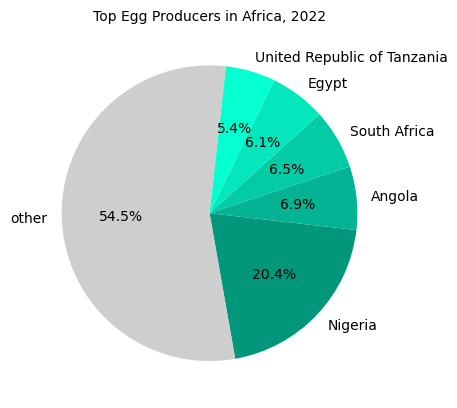

In [87]:
color =['#02967b','#03b393','#03cba6','#04e6bc','#04ffd1','#cecece']
plt.pie(top_5_with_other, labels=top_5_with_other.index, colors=color, autopct='%1.1f%%', startangle=280)
plt.title('Top Egg Producers in Africa, 2022',fontsize=10)
plt.show()

This pie chart represents the top 5 egg-producing countries in Africa for the year 2022. The remaining countries are grouped under the 'Other' category, providing a comparative view of the leading producers and the overall distribution of egg production across the continent.

<a name="5-3"></a>
### 5.3 - Meat Production

Meat production,the largest livestock product in Africa, reached 704 million tons (43.62%) in 2022. This analysis explores the key Meat regions and the significant impact of various Meat products on overall production during the year.

#### a.Types of Meat Products

In [88]:
df_2022_meat= df_2022[df_2022['Category'] =='Meat'][['Item','Value','Area']]
df_2022_meat = df_2022_meat.groupby('Item').sum(['Value']).sort_values(by="Value",ascending=False).reset_index()
df_2022_meat.head()

,Item,Value
0,"Meat of goat, fresh or chilled",1.333391e+08
1,"Edible offal of goat, fresh, chilled or frozen",1.333391e+08
2,"Meat of sheep, fresh or chilled",1.287163e+08
3,"Edible offal of sheep, fresh, chilled or frozen",1.287163e+08
4,"Edible offal of cattle, fresh, chilled or frozen",4.290495e+07


#### *Meat production is divided into two categories: pure meat from livestock animals and edible offal, which refers to the internal organs of butchered animals, also known as organ meats.*

In [89]:
def offal(x):
    if bool(re.search(r'Edible',x)):
        return 1
    else:
        return 0
df_2022_meat["offal"]= df_2022_meat['Item'].apply(lambda x: offal(x) )

In [90]:
df_2022_meat.head()

,Item,Value,offal
0,"Meat of goat, fresh or chilled",1.333391e+08,0
1,"Edible offal of goat, fresh, chilled or frozen",1.333391e+08,1
2,"Meat of sheep, fresh or chilled",1.287163e+08,0
3,"Edible offal of sheep, fresh, chilled or frozen",1.287163e+08,1
4,"Edible offal of cattle, fresh, chilled or frozen",4.290495e+07,1


In [91]:
df_meat= df_2022_meat[df_2022_meat['offal']==0]
df_offal= df_2022_meat[df_2022_meat['offal']==1]

In [92]:
top_5_meat =df_meat.nlargest(5,"Value")
top_5_offal =df_offal.nlargest(5,"Value")
print("Top 5 Meat Product")
display(top_5_meat)
print("Top 5 Edible offal Product")
display(top_5_offal)

Top 5 Meat Product


,Item,Value,offal
0,"Meat of goat, fresh or chilled",133339132.0,0
2,"Meat of sheep, fresh or chilled",128716305.0,0
5,"Meat of cattle with the bone, fresh or chilled",42904945.0,0
6,"Meat of pig with the bone, fresh or chilled",41624615.0,0
8,"Meat of chickens, fresh or chilled",5823025.0,0


Top 5 Edible offal Product


,Item,Value,offal
1,"Edible offal of goat, fresh, chilled or frozen",1.333391e+08,1
3,"Edible offal of sheep, fresh, chilled or frozen",1.287163e+08,1
4,"Edible offal of cattle, fresh, chilled or frozen",4.290495e+07,1
7,"Edible offal of pigs, fresh, chilled or frozen",4.162461e+07,1
9,"Edible offals of camels and other camelids, fr...",1.631603e+06,1


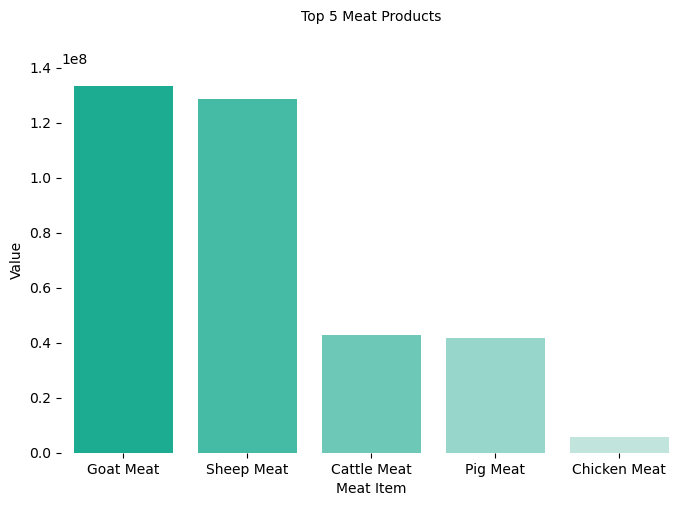

In [93]:

plt.figure(figsize=(8,5))
# Generate a dark palette
palette = sns.light_palette("#03c4a1",reverse=True)

# Create a barplot with the custom palette
sns.barplot(x=top_5_meat.Item, y=top_5_meat.Value, palette=palette)

meat_type =['Goat Meat','Sheep Meat','Cattle Meat','Pig Meat','Chicken Meat']
pos =np.arange(len(meat_type))
plt.title('Top 5 Meat Products', fontsize=10,y=1.1)
plt.xticks(pos, meat_type);
plt.xlabel('Meat Item',fontsize=10,y=1.2)
plt.ylabel('Value')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Show the plot
plt.show()


The chart above shows the production of the top 5 meat products. Goat meat leads with approximately 133 million tons, followed by sheep meat at 128 million tons, and cattle meat at 42 million tons. Pig meat ranks next at 41 million tons, with chicken meat contributing around 6 million tons."

In [94]:
display(top_5_offal)

,Item,Value,offal
1,"Edible offal of goat, fresh, chilled or frozen",1.333391e+08,1
3,"Edible offal of sheep, fresh, chilled or frozen",1.287163e+08,1
4,"Edible offal of cattle, fresh, chilled or frozen",4.290495e+07,1
7,"Edible offal of pigs, fresh, chilled or frozen",4.162461e+07,1
9,"Edible offals of camels and other camelids, fr...",1.631603e+06,1


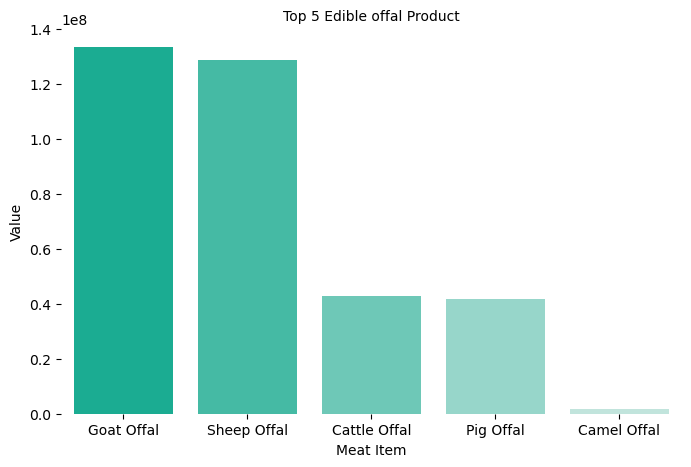

In [170]:
plt.figure(figsize=(8,5))

# Generate a dark palette
palette = sns.light_palette("#03c4a1",reverse=True)
sns.barplot(x=top_5_offal.Item,y=top_5_offal.Value,palette=palette)

offal_type =['Goat Offal','Sheep Offal','Cattle Offal','Pig Offal','Camel Offal']
pos =np.arange(len(offal_type))

plt.title('Top 5 Edible offal Product',fontsize=10)
plt.xticks(pos, offal_type);
plt.xlabel('Meat Item')
plt.ylabel('Value')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Show the plot
plt.show()

The chart above shows the production of the top 5 edible offal products. Goat offal leads with approximately 133 million tons, followed by sheep offal at 128 million tons, and cattle offal at 42 million tons. Pig offal ranks next at 41 million tons, with camel offal contributing around 2 million tons.

#### Meat Producers In Africa

In [96]:
def top_5_and_other(area_producer,produce):
    top_5 = area_producer.nlargest(5,"Value")
    other = area_producer.nsmallest(len(area_producer) - 5, "Value").sum()
    val=[i for i in top_5.Value]+[other.Value]
    ind=[i for i in top_5.index]+['other']
    top_5_with_other = pd.Series(data=val,index=ind)
    print(top_5_with_other)
    color =['#02967b','#03b393','#03cba6','#04e6bc','#04ffd1','#cecece']
    plt.pie(top_5_with_other, labels=top_5_with_other.index, colors=color, autopct='%1.1f%%', startangle=280)
    plt.title(f'Top {produce} Producers in Africa, 2022',fontsize=10)
    return plt.show()

Nigeria     1.170466e+08
Sudan       6.588525e+07
Ethiopia    6.193095e+07
Chad        5.851321e+07
Malawi      4.298458e+07
other       3.578950e+08
dtype: float64


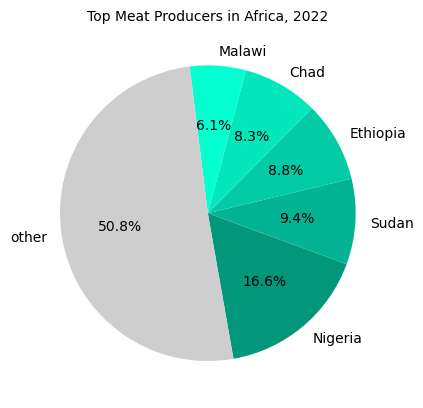

In [97]:
df_2022_meat= df_2022[df_2022['Category'] =='Meat'][['Item','Value','Area']]
area_producer = df_2022_meat.groupby('Area').sum("Value").sort_values(by='Value',ascending=False)
top_5_and_other(area_producer,"Meat")

This pie chart represents the top 5 Meat-producing countries in Africa for the year 2022. The remaining countries are grouped under the 'Other' category, providing a comparative view of the leading producers and the overall distribution of Meat production across the continent.

<a name="5-4"></a>
### 5.4 - Hides Production

Hides are the third most produced livestock product in Africa, with about 305 million tons in production. Hides have long been a major source of material for clothing and other industries.

#### a. Types of Hide Products

In [150]:
df_2022_Hides= df_2022[df_2022['Category'] =='Hides'][['Item','Value','Area']]
df_2022_Hides = df_2022_Hides.groupby('Item').sum(['Value']).sort_values(by="Value",ascending=False).reset_index()
df_2022_Hides

,Item,Value
0,Raw hides and skins of goats or kids,133339132.0
1,Raw hides and skins of sheep or lambs,128716305.0
2,Raw hides and skins of cattle,42904945.0
3,Raw hides and skins of buffaloes,598020.0


Only five kinds of Hide were in production in Africa in 2022, Goat hide, Sheep hide,Cattle hides and buffaloes hides

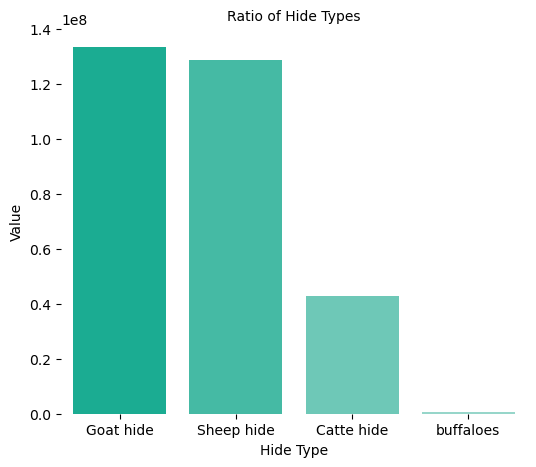

In [168]:
plt.figure(figsize=(6,5))

hide_type =['Goat hide','Sheep hide','Catte hide','buffaloes']
pos = np.arange(len(hide_type))
palette = sns.light_palette("#03c4a1",reverse=True)
sns.barplot(x=df_2022_Hides.index,y=df_2022_Hides.Value, palette=palette )
plt.xticks(pos, hide_type);
plt.xlabel("Hide Type");
plt.title("Ratio of Hide Types",fontsize=10)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [152]:
df_hide = df[df['Category'] =='Hides'][['Item','Year','Value']]
df_hide.head()

,Item,Year,Value
1270,Raw hides and skins of cattle,1961,200000.0
1271,Raw hides and skins of cattle,1962,180000.0
1272,Raw hides and skins of cattle,1963,156170.0
1273,Raw hides and skins of cattle,1964,180000.0
1274,Raw hides and skins of cattle,1965,200000.0


In [153]:
df_hide.Item

1270             Raw hides and skins of cattle
1271             Raw hides and skins of cattle
1272             Raw hides and skins of cattle
1273             Raw hides and skins of cattle
1274             Raw hides and skins of cattle
                         ...                  
71366    Raw hides and skins of sheep or lambs
71367    Raw hides and skins of sheep or lambs
71368    Raw hides and skins of sheep or lambs
71369    Raw hides and skins of sheep or lambs
71370    Raw hides and skins of sheep or lambs
Name: Item, Length: 9933, dtype: object

#### b. Yearly trends of Hides production

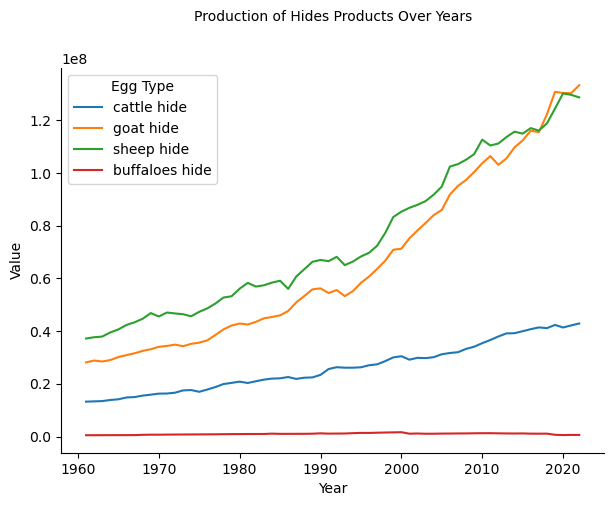

In [154]:
plt.figure(figsize=(7,5))

sns.lineplot(df_hide, x=df_hide.Year, y=df_hide.Value,estimator=sum, hue="Item",errorbar=None)

custom_labels = ['cattle hide', 'goat hide','sheep hide',"buffaloes hide"]  
plt.legend(title='Egg Type', labels=custom_labels)

plt.title('Production of Hides Products Over Years', fontsize=10, y=1.1)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Nigeria      50302911.0
Sudan        32374576.0
Ethiopia     30717933.0
Chad         29108760.0
Algeria      20590986.0
other       142463236.0
dtype: float64


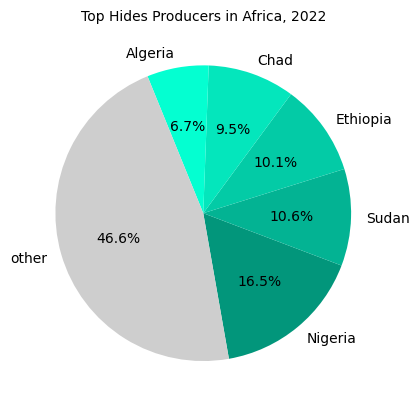

In [155]:
df_2022_hides= df_2022[df_2022['Category'] =='Hides'][['Item','Value','Area']]
area_producer =df_2022_hides.groupby('Area').sum("Value").sort_values(by='Value',ascending=False)
top_5_and_other(area_producer,"Hides")

This pie chart represents the top 5 Hides-producing countries in Africa for the year 2022. The remaining countries are grouped under the 'Other' category, providing a comparative view of the leading producers and the overall distribution of Hides production across the continent.

<a name="5-5"></a>
### 5.5 - Milk Production

Milk still remain on of the major livestock production in africa about 255M ton of mike was produce in 2022.This analysis explores the key Milk-producing regions and the significant impact of various Milk products on overall production during the year.

#### a.Types of Milk Products

In [104]:
df_2022_milk= df_2022[df_2022['Category'] =='Milk'][['Item','Value','Area']]
df_2022_milk = df_2022_milk.groupby('Item').sum(['Value']).sort_values(by="Value",ascending=False).reset_index()
df_2022_milk

,Item,Value
0,Raw milk of sheep,90946813.0
1,Raw milk of goats,88685034.0
2,Raw milk of cattle,67646486.0
3,Raw milk of camel,7339774.0
4,Raw milk of buffalo,732639.0


Only five kinds of Hide were in production in Africa in 2022, Sheep Milk,Goat Milk,Cattle Milk,Camel Milk and buffaloes Milk

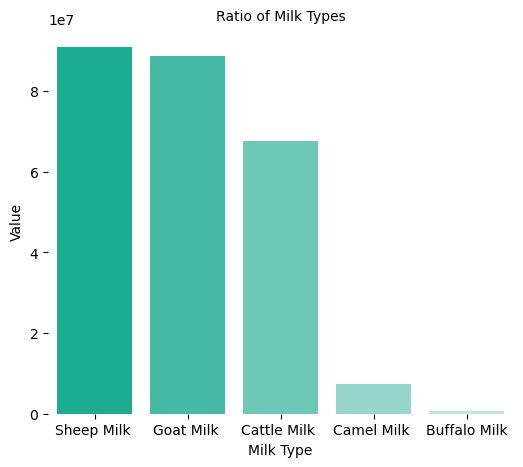

In [128]:
plt.figure(figsize=(6,5))

milk_type =['Sheep Milk ','Goat Milk ','Cattle Milk ','Camel Milk ','Buffalo Milk']
pos = np.arange(len(milk_type))

palette = sns.light_palette("#03c4a1",reverse=True)
sns.barplot(x=df_2022_milk.index,y=df_2022_milk.Value, palette=palette)
plt.xticks(pos, milk_type);
plt.xlabel("Milk Type");
plt.title("Ratio of Milk Types",fontsize=10)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [63]:
df_milk = df[df['Category'] =='Milk'][['Item','Year','Value']]
df_milk.head()

,Item,Year,Value
1456,Raw milk of camel,1961,37000.0
1457,Raw milk of camel,1962,37000.0
1458,Raw milk of camel,1963,27000.0
1459,Raw milk of camel,1964,32000.0
1460,Raw milk of camel,1965,31000.0


#### b. Yearly trends of milk production

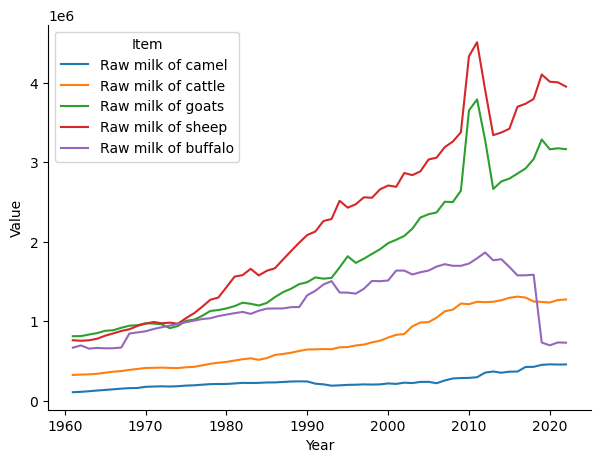

In [64]:
plt.figure(figsize=(7,5))
sns.lineplot(df_milk,x=df_milk.Year,y=df_milk.Value,hue="Item",errorbar=None);
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Sudan           52122603.0
Mali            37140642.0
Algeria         22887911.0
South Sudan     21688146.0
Somalia         15167556.0
other          106343888.0
dtype: float64


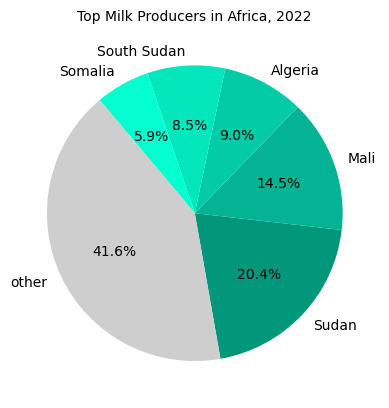

In [65]:
df_2022_milk= df_2022[df_2022['Category'] =='Milk'][['Item','Value','Area']]
area_producer =df_2022_milk.groupby('Area').sum("Value").sort_values(by='Value',ascending=False)
top_5_and_other(area_producer,"Milk")

This pie chart represents the top 5 Milk-producing countries in Africa for the year 2022. The remaining countries are grouped under the 'Other' category, providing a comparative view of the leading producers and the overall distribution of Nilk production across the continent.

<a name="5-6"></a>
### 5.6 - Fat Production

In [156]:
df_2022_Fat= df_2022[df_2022['Category'] =='Fat'][['Item','Value','Area']]
df_2022_Fat = df_2022_Fat.groupby('Item').sum(['Value']).sort_values(by="Value",ascending=False).reset_index()
df_2022_Fat

,Item,Value
0,"Goat fat, unrendered",1.333391e+08
1,"Sheep fat, unrendered",1.287163e+08
2,"Cattle fat, unrendered",4.290495e+07
3,Fat of pigs,4.162461e+07
4,Fat of camels,1.631603e+06
5,"Buffalo fat, unrendered",5.980201e+05


Only six kinds of Fat were in production in Africa in 2022, Goat fat, Sheep fat,Cattle fat and Buffaloes fat,Camels fat, Pig fat.

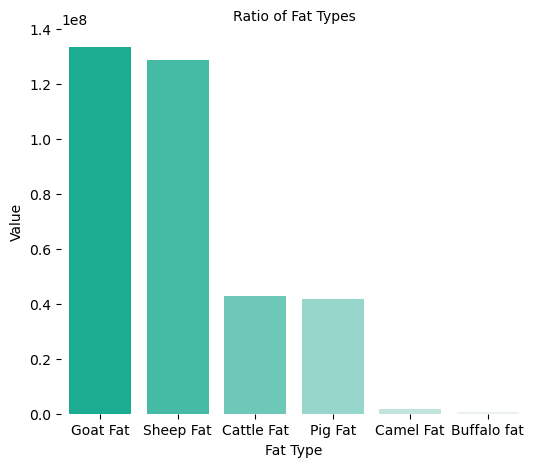

In [157]:
plt.figure(figsize=(6,5))

fat_type =['Goat Fat','Sheep Fat','Cattle Fat','Pig Fat','Camel Fat','Buffalo fat']
pos = np.arange(len(fat_type))

palette = sns.light_palette("#03c4a1",reverse=True)
sns.barplot(x=df_2022_Fat.index,y=df_2022_Fat.Value, palette=palette)
plt.xticks(pos, fat_type);
plt.xlabel("Fat Type");
plt.title("Ratio of Fat Types",fontsize=10)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Goat fat had the highest production of about 133M ton and sheep fat of about 43M ton followed by pig fat which had aroung 41 m ton, camel fat 12M ton and Buffalo fat 5M ton where in production

In [158]:
df_2022_Fat

,Item,Value
0,"Goat fat, unrendered",1.333391e+08
1,"Sheep fat, unrendered",1.287163e+08
2,"Cattle fat, unrendered",4.290495e+07
3,Fat of pigs,4.162461e+07
4,Fat of camels,1.631603e+06
5,"Buffalo fat, unrendered",5.980201e+05


In [159]:
df_fat = df[df['Category'] =='Fat'][['Item','Year','Value']]
df_fat.head()

,Item,Year,Value
30,"Cattle fat, unrendered",1961,200000.0
31,"Cattle fat, unrendered",1962,180000.0
32,"Cattle fat, unrendered",1963,156170.0
33,"Cattle fat, unrendered",1964,180000.0
34,"Cattle fat, unrendered",1965,200000.0


#### b. Yearly trends of fat production

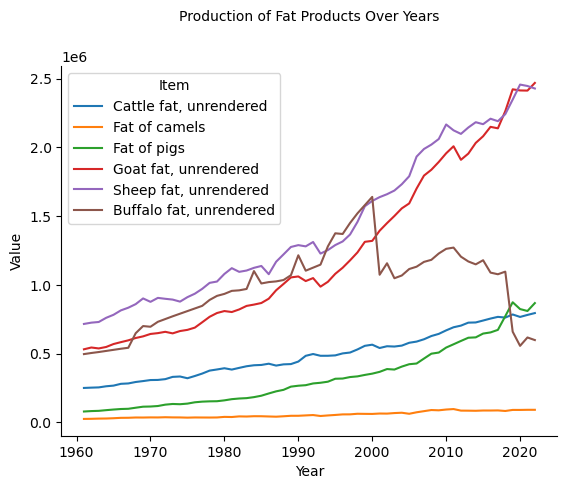

In [160]:
sns.lineplot(df_fat,x=df_fat.Year,y=df_fat.Value,hue="Item",errorbar=None)
plt.title('Production of Fat Products Over Years', fontsize=10, y=1.1)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Nigeria     5.837229e+07
Sudan       3.292579e+07
Ethiopia    3.093463e+07
Chad        2.924141e+07
Malawi      2.146749e+07
other       1.758730e+08
dtype: float64


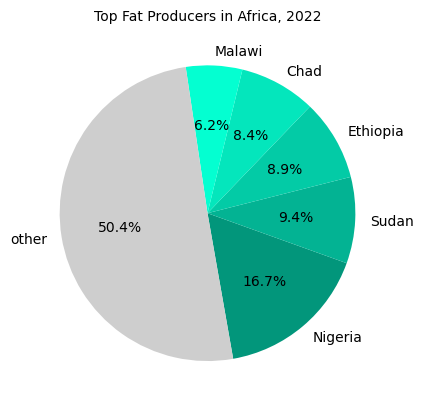

In [161]:
df_2022_fat= df_2022[df_2022['Category'] =='Fat'][['Item','Value','Area']]
area_producer =df_2022_fat.groupby('Area').sum("Value").sort_values(by='Value',ascending=False)
top_5_and_other(area_producer,"Fat")

This pie chart represents the top 5 Fat-producing countries in Africa for the year 2022. The remaining countries are grouped under the 'Other' category, providing a comparative view of the leading producers and the overall distribution of Fat production across the continent.

<a name="6"></a>
## 6 - Statistical Analysis

### Hypotheses

#### West Africa and East Africa are the two dominant region in africa, we can use hythonsis to check if their is a significant difference between the two region

In [162]:
df_2022.head()

,Area,Year,Element,Item,Value,Category,region
91,Algeria,2022,Producing Animals/Slaughtered,"Cattle fat, unrendered",635036.13,Fat,North Africa
153,Algeria,2022,Producing Animals/Slaughtered,"Edible offal of cattle, fresh, chilled or frozen",635036.13,Meat,North Africa
215,Algeria,2022,Producing Animals/Slaughtered,"Edible offal of goat, fresh, chilled or frozen",1923868.93,Meat,North Africa
277,Algeria,2022,Producing Animals/Slaughtered,"Edible offal of pigs, fresh, chilled or frozen",2782.43,Meat,North Africa
339,Algeria,2022,Producing Animals/Slaughtered,"Edible offal of sheep, fresh, chilled or frozen",18032081.47,Meat,North Africa


In [163]:
df_2022.region.value_counts()

region
East Africa        373
West Africa        347
Central Africa     178
North Africa       158
Southern Africa    102
Name: count, dtype: int64

In [164]:
west_africa = df_2022[(df_2022["region"]=="West Africa")]['Value']
east_africa = df_2022[(df_2022["region"]=="East Africa")]['Value']

In [165]:
t_stat, p_value = ttest_ind(west_africa, east_africa)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.245137874385941
P-value: 0.806419723613876


In [166]:
if p_value < 0.05: 
    print("Reject the null hypothesis: There is a significant difference between West Africa and East Africa production.")
else:
    print("Fail to reject the null hypothesis: No significant difference in production between West Africa and East Africa.")

Fail to reject the null hypothesis: No significant difference in production between West Africa and East Africa.


<a name="7"></a>
## 7 - Findings

- Egg Production:
West Africa emerged as the largest producer of eggs in 2022, with 39.9% of total egg production. The dominant egg type was Hen Egg, accounting for 94.7% of production.

- Meat Production:
Meat production was primarily driven by goat meat, sheep meat, and cattle meat. East Africa led in overall meat production, with a 31.1% contribution. North Africa and West Africa followed closely behind.

- Hides:
Hides were the third most produced livestock product in Africa, with over 305 million tons produced. They play an important role in the region’s textile and leather industries.

- Milk Production:
The analysis showed that milk production was highest in East Africa and North Africa, contributing over 69.32% to the total milk production across the continent.

- Regional Variations:
Significant differences in livestock production were observed across regions, with East Africa showing a stronger focus on meat and hides, while West Africa led in egg production.

- Fat Production:
Fat production was another key livestock product, with about 346 million tons produced. East Africa was again the leading contributor, producing 31.3% of the total fat output in Africa.


<a name="8"></a>
## 8 - Conclusions

This analysis offers valuable insights into livestock production across Africa, highlighting the role of different regions in producing key livestock products like meat, eggs, and hides. It also identified growth patterns and significant regional differences in production, which can inform future agricultural policies and investments. Understanding these trends helps provide a foundation for improving livestock management, food security, and economic stability in Africa.